In [1]:
import pandas as pd

**Get the Dataset**

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


 **Understand and Explore the Data (EDA)**

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89220 entries, 0 to 89219
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89220 non-null  int64  
 1   V1      89220 non-null  float64
 2   V2      89220 non-null  float64
 3   V3      89220 non-null  float64
 4   V4      89220 non-null  float64
 5   V5      89220 non-null  float64
 6   V6      89220 non-null  float64
 7   V7      89220 non-null  float64
 8   V8      89220 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22

In [6]:
# Check class distribution
print(df['Class'].value_counts())

Class
0.0    89008
1.0      211
Name: count, dtype: int64


**Visualizations**

Text(0.5, 1.0, 'Fraudulent vs Non-Fraudulent Transactions')

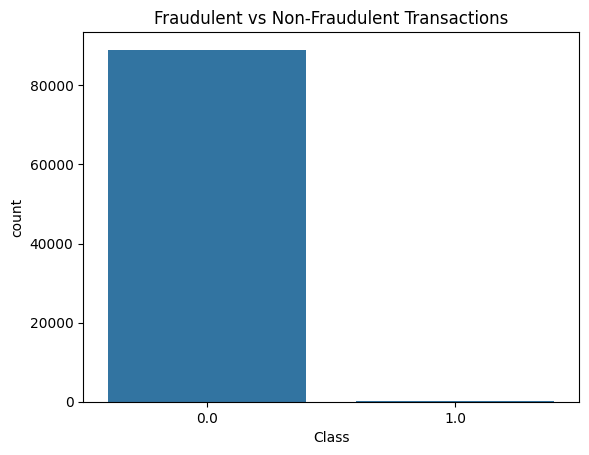

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check fraud vs non-fraud count
sns.countplot(x='Class', data=df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
#the credit card fraud dataset :the number of fraudulent transactions is much smaller than normal ones.

**Preprocess Data**

In [9]:
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

df = df.drop(['Time', 'Amount'], axis=1)

In [14]:
df.isnull().sum().sort_values(ascending=False)


,0
V15,1
V13,1
V14,1
V12,1
V11,1
V10,1
V9,1
V23,1
V22,1
V21,1


In [17]:
df = df.dropna()


**Train-Test Split**

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**SMOTE for Imbalanced Data**

In [25]:
#Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

**Train And Evaluate the Model**

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict class labels (binary)
y_pred = model.predict(X_test)

# Predict probabilities (for ROC-AUC)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

[[17387   402]
 [    5    50]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17789
           1       0.11      0.91      0.20        55

    accuracy                           0.98     17844
   macro avg       0.56      0.94      0.59     17844
weighted avg       1.00      0.98      0.99     17844

ROC-AUC: 0.9766975505802871


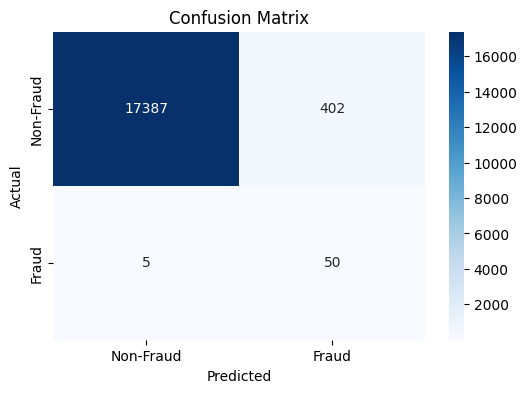

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

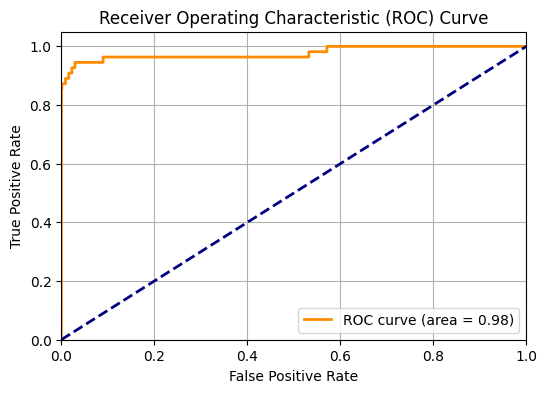

In [34]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot it
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [35]:
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']